In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip uninstall sklearn -y
!pip install --upgrade sklearn
!pip install scikit-learn==0.23.2 --user

Found existing installation: sklearn 0.0.post1
Uninstalling sklearn-0.0.post1:
  Successfully uninstalled sklearn-0.0.post1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached sklearn-0.0.post1-py3-none-any.whl
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import imp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, log_loss
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier

import lightgbm 


import warnings
warnings.filterwarnings('ignore')

In [ ]:
!unzip -qq '/content/drive/MyDrive/축구 ㄱㄱ.zip'

replace open/sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
train_df = pd.read_csv('/content/open/train.csv')

In [ ]:
train_df

,ID,Age,Height,Weight,Position,PreferredFoot,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,...,CMRating,RMRating,LWBRating,CDMRating,RWBRating,LBRating,CBRating,RBRating,GKRating,Prospect
0,TRAIN_0000,21,182,82,CB,Right,Medium,Medium,4.6377,2.1053,...,4.9315,4.8649,6.1972,6.0000,6.1972,6.4286,6.5278,6.4286,0.875,0
1,TRAIN_0001,21,160,75,ST,Left,High,Medium,7.3913,7.3684,...,5.8904,6.4865,5.2113,4.4286,5.2113,5.0000,4.1667,5.0000,1.250,0
2,TRAIN_0002,18,165,60,RB,Right,Medium,Medium,6.2319,3.2895,...,4.9315,5.2703,5.7746,5.1429,5.7746,5.8571,5.0000,5.8571,0.750,0
3,TRAIN_0003,20,190,72,CB,Right,Medium,Medium,4.7826,1.0526,...,2.3288,2.2973,4.0845,3.7143,4.0845,4.5714,4.5833,4.5714,0.875,0
4,TRAIN_0004,21,181,77,ST,Right,High,Medium,8.2609,7.3684,...,6.3014,7.5676,5.2113,4.2857,5.2113,4.7143,3.3333,4.7143,1.125,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3014,TRAIN_3014,19,178,65,CAM,Right,Medium,Medium,5.9420,3.0263,...,5.0685,5.1351,5.0704,4.7143,5.0704,5.0000,4.3056,5.0000,0.500,1
3015,TRAIN_3015,19,172,60,CAM,Right,High,Low,7.1014,7.5000,...,7.8082,8.3784,6.4789,5.7143,6.4789,6.1429,4.0278,6.1429,0.875,0
3016,TRAIN_3016,21,173,70,CM,Right,Medium,High,4.7826,5.6579,...,7.1233,6.7568,7.3239,7.1429,7.3239,7.2857,6.5278,7.2857,1.000,0
3017,TRAIN_3017,21,182,77,CM,Right,High,High,6.3768,6.1842,...,8.3562,7.8378,8.4507,8.5714,8.4507,8.2857,7.7778,8.2857,1.125,0


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3019 entries, 0 to 3018
Data columns (total 66 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 3019 non-null   object 
 1   Age                3019 non-null   int64  
 2   Height             3019 non-null   int64  
 3   Weight             3019 non-null   int64  
 4   Position           3019 non-null   object 
 5   PreferredFoot      3019 non-null   object 
 6   AttackingWorkRate  3019 non-null   object 
 7   DefensiveWorkRate  3019 non-null   object 
 8   PaceTotal          3019 non-null   float64
 9   ShootingTotal      3019 non-null   float64
 10  PassingTotal       3019 non-null   float64
 11  DribblingTotal     3019 non-null   float64
 12  DefendingTotal     3019 non-null   float64
 13  PhysicalityTotal   3019 non-null   float64
 14  Crossing           3019 non-null   float64
 15  Finishing          3019 non-null   float64
 16  HeadingAccuracy    3019 

In [ ]:
print('데이터 칼럼:', train_df.columns)
print('전체 데이터의 길이:', len(train_df))
print('데이터 컬럼의 수:', len(train_df.columns))

데이터 칼럼: Index(['ID', 'Age', 'Height', 'Weight', 'Position', 'PreferredFoot',
       'AttackingWorkRate', 'DefensiveWorkRate', 'PaceTotal', 'ShootingTotal',
       'PassingTotal', 'DribblingTotal', 'DefendingTotal', 'PhysicalityTotal',
       'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes', 'STRating',
       'LWRating', 'LFRating', 'CFRating', 'RFRating', 'RWRating', 'CAMRating',
       'LMRating', 'CMRating', 'RMRating', 'LWBRating', 'CDMRating',
       'RWBRating', 'LBRating', 'CBRating', 'RBRating', 'GKRating',
       'Prospect'],
      

In [ ]:
test_df = pd.read_csv('/content/open/test.csv')

In [ ]:
test_df

,ID,Age,Height,Weight,Position,PreferredFoot,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,...,LMRating,CMRating,RMRating,LWBRating,CDMRating,RWBRating,LBRating,CBRating,RBRating,GKRating
0,TEST_0000,17,184,75,GK,Right,Medium,Medium,3.7681,5.3947,...,0.1351,0.5479,0.1351,0.2817,0.4286,0.2817,0.2857,0.2778,0.2857,5.500
1,TEST_0001,19,188,80,ST,Right,High,Medium,4.9275,4.8684,...,4.1892,3.4247,4.1892,3.0986,2.7143,3.0986,3.0000,3.0556,3.0000,0.750
2,TEST_0002,17,173,68,CAM,Right,High,High,6.9565,6.3158,...,8.3784,8.6301,8.3784,8.3099,8.2857,8.3099,8.1429,7.0833,8.1429,1.125
3,TEST_0003,20,178,69,CAM,Right,Medium,Medium,6.8116,6.4474,...,7.1622,6.7123,7.1622,5.6338,5.1429,5.6338,5.2857,4.1667,5.2857,1.375
4,TEST_0004,19,176,72,CAM,Left,High,Low,5.5072,4.7368,...,5.9459,5.4795,5.9459,5.0704,4.7143,5.0704,4.8571,4.0278,4.8571,0.750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1621,TEST_1621,19,178,64,CAM,Right,Medium,Medium,4.3478,4.6053,...,5.6757,5.3425,5.6757,4.7887,4.2857,4.7887,4.5714,3.6111,4.5714,0.750
1622,TEST_1622,20,179,73,CDM,Right,Medium,Medium,5.3623,2.1053,...,4.4595,4.7945,4.4595,5.4930,5.4286,5.4930,5.7143,5.4167,5.7143,0.875
1623,TEST_1623,21,177,75,CM,Left,Medium,Medium,5.5072,4.8684,...,6.2162,6.3014,6.2162,6.1972,6.0000,6.1972,6.0000,5.2778,6.0000,0.750
1624,TEST_1624,18,176,66,CAM,Left,Medium,Medium,5.0725,3.8158,...,5.1351,5.0685,5.1351,4.6479,4.4286,4.6479,4.7143,4.0278,4.7143,1.000


In [ ]:
print('데이터 칼럼:', test_df.columns)
print('전체 데이터의 길이:', len(test_df))
print('데이터 컬럼의 수:', len(test_df.columns))

데이터 칼럼: Index(['ID', 'Age', 'Height', 'Weight', 'Position', 'PreferredFoot',
       'AttackingWorkRate', 'DefensiveWorkRate', 'PaceTotal', 'ShootingTotal',
       'PassingTotal', 'DribblingTotal', 'DefendingTotal', 'PhysicalityTotal',
       'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes', 'STRating',
       'LWRating', 'LFRating', 'CFRating', 'RFRating', 'RWRating', 'CAMRating',
       'LMRating', 'CMRating', 'RMRating', 'LWBRating', 'CDMRating',
       'RWBRating', 'LBRating', 'CBRating', 'RBRating', 'GKRating'],
      dtype='object')
전체 

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1626 entries, 0 to 1625
Data columns (total 65 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 1626 non-null   object 
 1   Age                1626 non-null   int64  
 2   Height             1626 non-null   int64  
 3   Weight             1626 non-null   int64  
 4   Position           1626 non-null   object 
 5   PreferredFoot      1626 non-null   object 
 6   AttackingWorkRate  1626 non-null   object 
 7   DefensiveWorkRate  1626 non-null   object 
 8   PaceTotal          1626 non-null   float64
 9   ShootingTotal      1626 non-null   float64
 10  PassingTotal       1626 non-null   float64
 11  DribblingTotal     1626 non-null   float64
 12  DefendingTotal     1626 non-null   float64
 13  PhysicalityTotal   1626 non-null   float64
 14  Crossing           1626 non-null   float64
 15  Finishing          1626 non-null   float64
 16  HeadingAccuracy    1626 

In [ ]:
print(train_df.select_dtypes(exclude=['object']).columns)

Index(['Age', 'Height', 'Weight', 'PaceTotal', 'ShootingTotal', 'PassingTotal',
       'DribblingTotal', 'DefendingTotal', 'PhysicalityTotal', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'STRating', 'LWRating',
       'LFRating', 'CFRating', 'RFRating', 'RWRating', 'CAMRating', 'LMRating',
       'CMRating', 'RMRating', 'LWBRating', 'CDMRating', 'RWBRating',
       'LBRating', 'CBRating', 'RBRating', 'GKRating', 'Prospect'],
      dtype='object')


In [ ]:
print(len(train_df.select_dtypes(exclude=['object']).columns))

61


In [ ]:
print(train_df.select_dtypes(include=['object']).columns)

Index(['ID', 'Position', 'PreferredFoot', 'AttackingWorkRate',
       'DefensiveWorkRate'],
      dtype='object')


In [ ]:
train_df_object = train_df.select_dtypes(include=['object'])

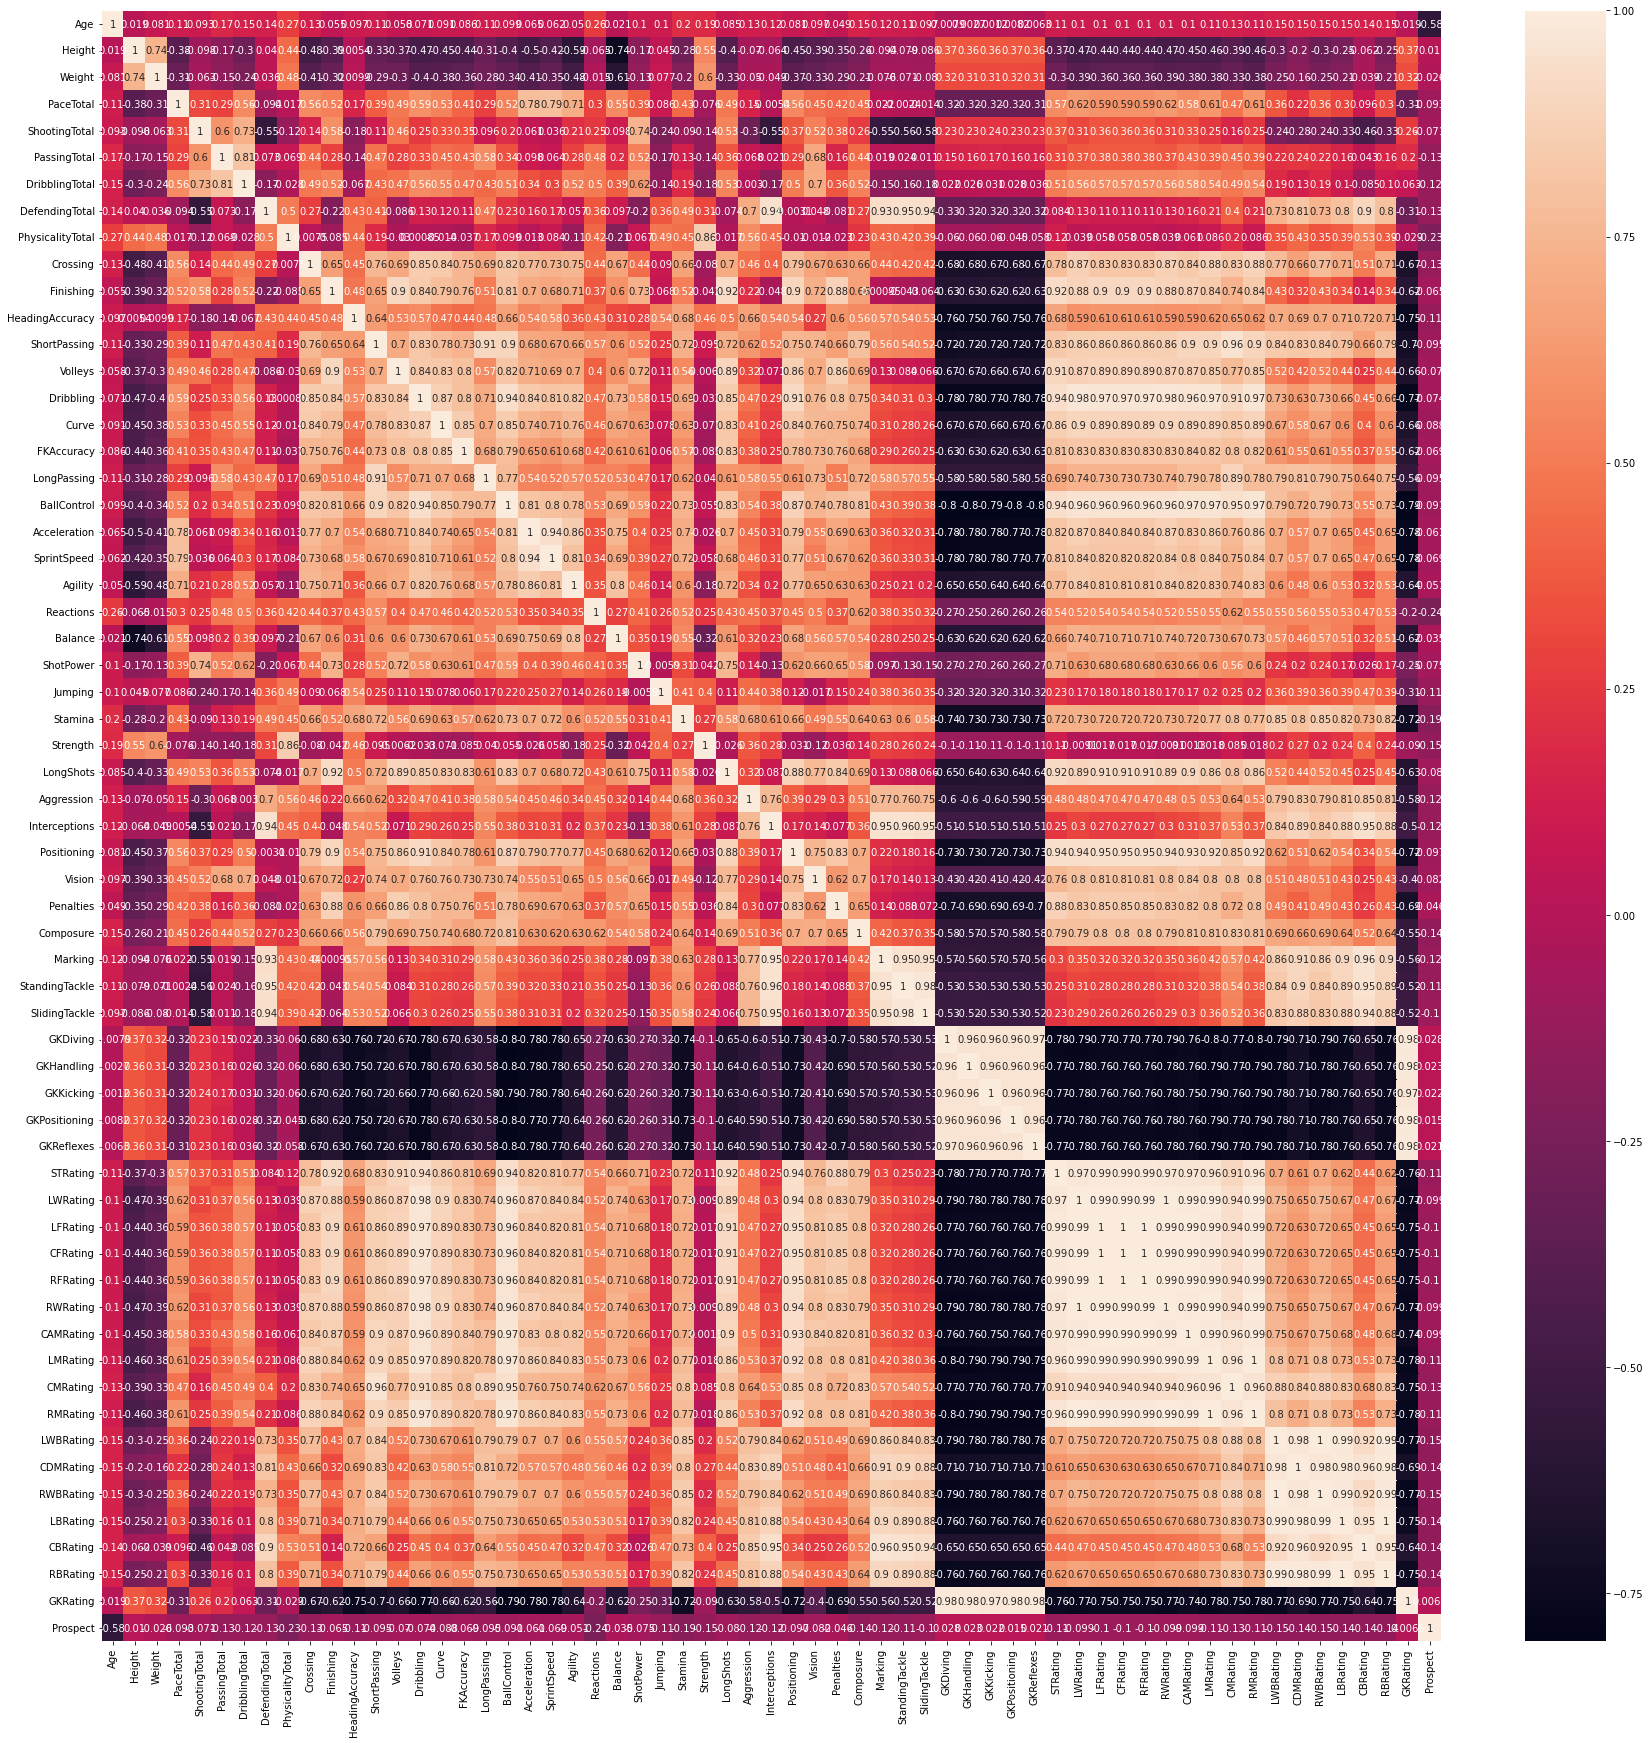

In [ ]:
#상관분석하기
#각 변수가 어떤 상관 관계가 있는지. 수치가 높을수록 관계가 있다는 것이다.
plt.figure(figsize=(30,30))
sns.heatmap(train_df.corr(), annot = True)
plt.show()

In [ ]:
train_df.drop(columns = ['Age'], inplace = True)
test_df.drop(columns = ['Age'], inplace = True)

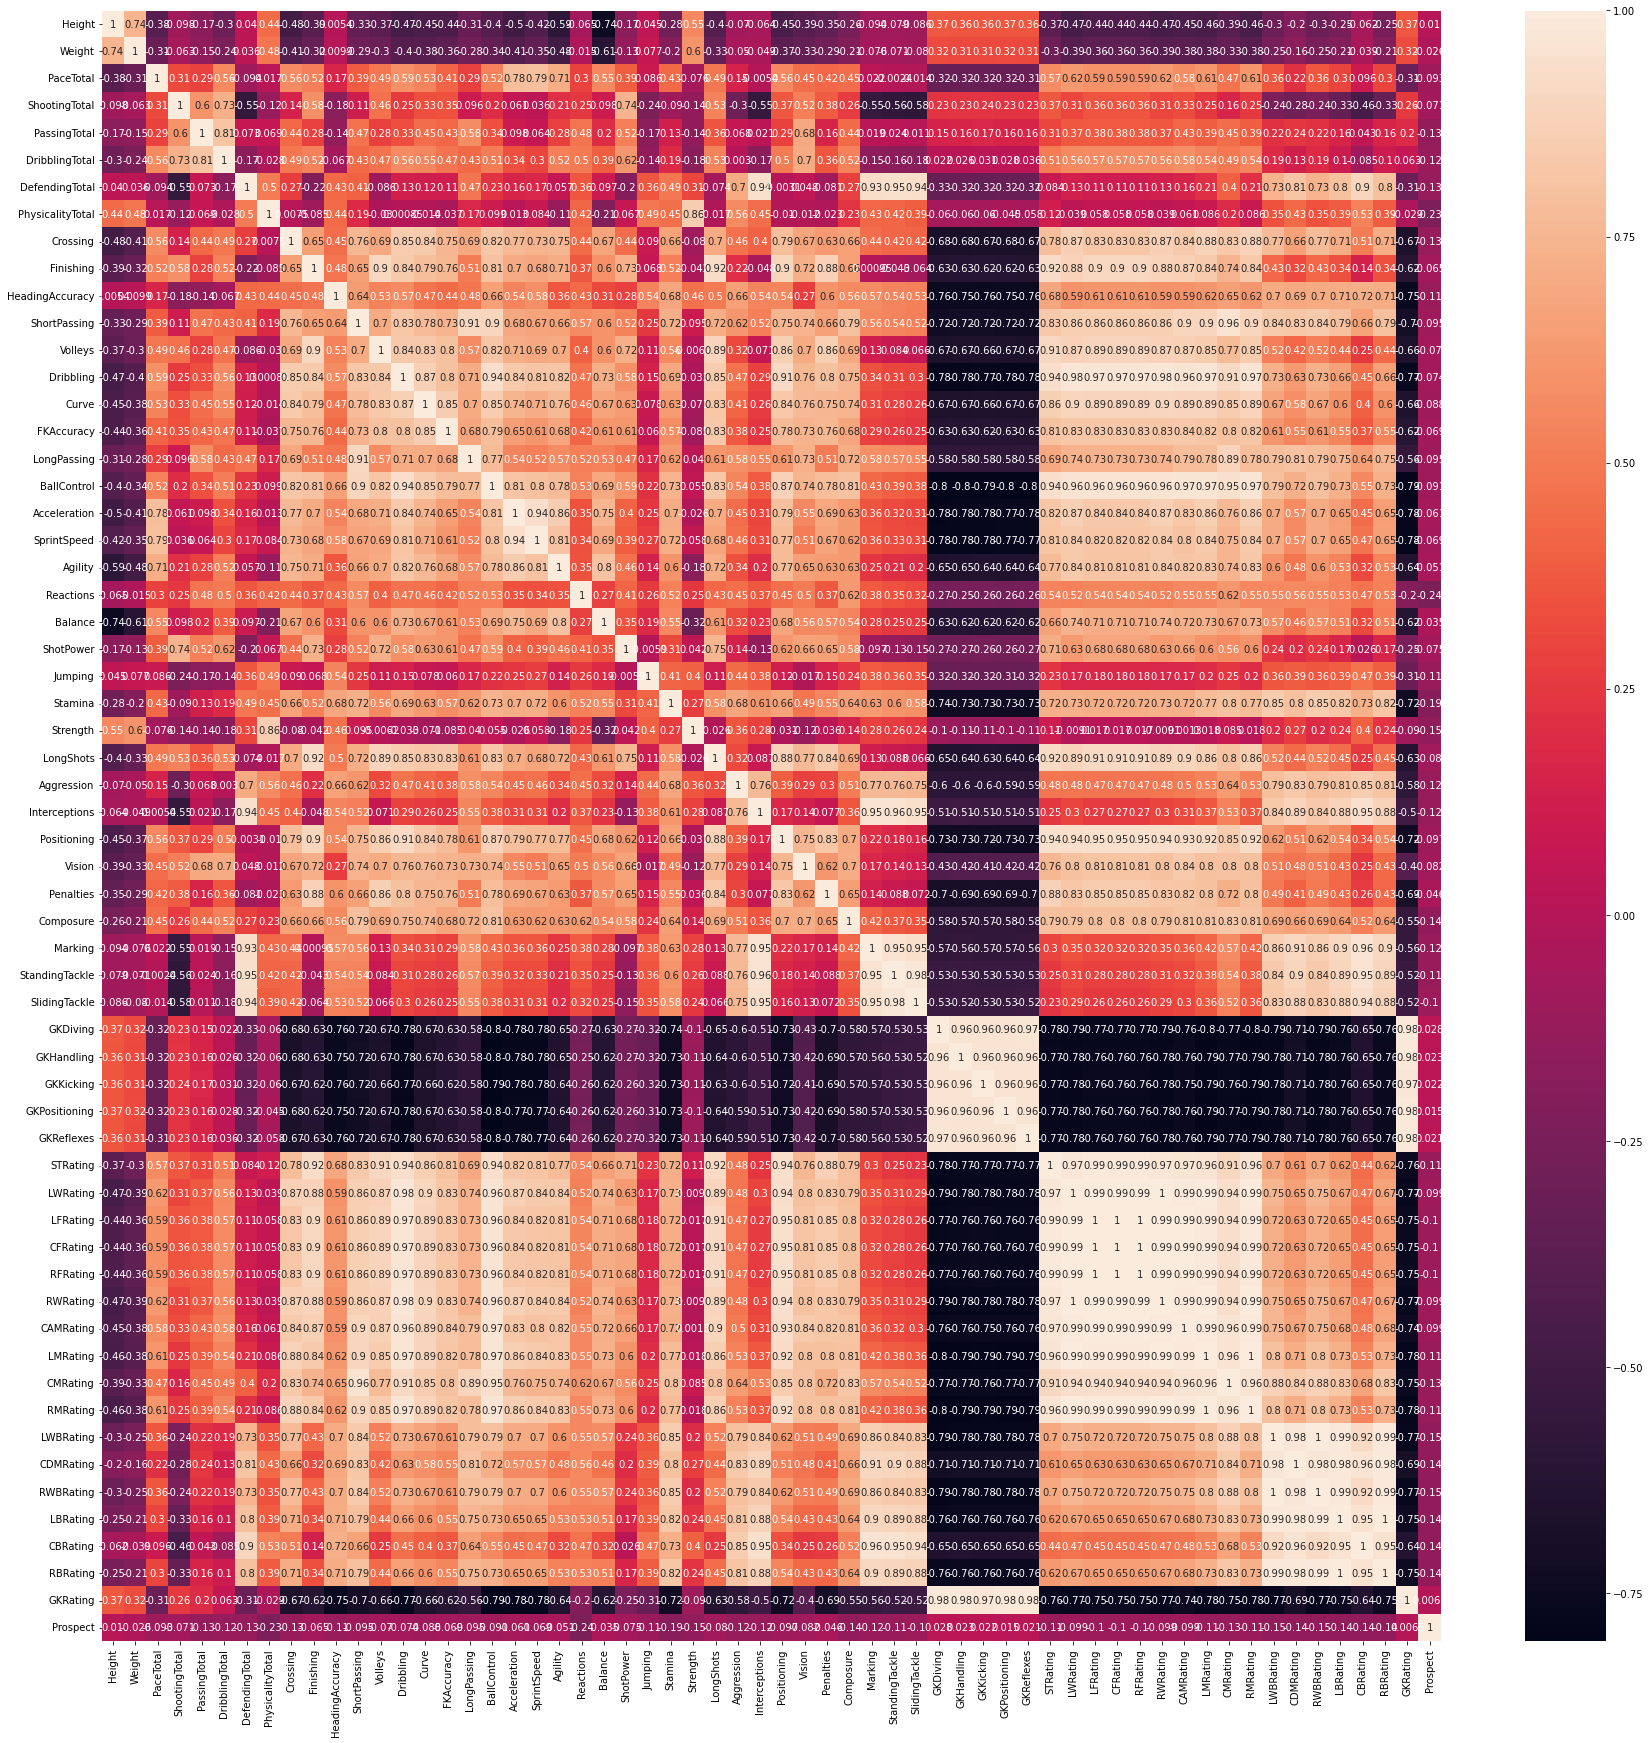

In [ ]:
#상관분석하기
#각 변수가 어떤 상관 관계가 있는지. 수치가 높을수록 관계가 있다는 것이다.
plt.figure(figsize=(30,30))
sns.heatmap(train_df.corr(), annot = True)
plt.show()

In [ ]:
!pip install pycaret

!pip install markupsafe==2.1.1

!pip install pandas-profiling==3.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached MarkupSafe-2.1.1-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (25 kB)
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.0.1
    Uninstalling MarkupSafe-2.0.1:
      Successfully uninstalled MarkupSafe-2.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.1.0 requires markupsafe~=2.0.1, but you have markupsafe 2.1.1 which is incompatible.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached MarkupSafe-2.0.1-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl (31 kB)
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.1
    Uninstalling MarkupSafe-2.1.1:
      Successfully uninstalled MarkupSafe-2.1.1


In [ ]:
from pycaret import classification

In [ ]:
classification_setup = classification.setup(data=train_df, target='Prospect',fold_strategy='stratifiedkfold')

,Description,Value
0,session_id,4115
1,Target,Prospect
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(3019, 65)"
5,Missing Values,False
6,Numeric Features,59
7,Categorical Features,5
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Prospect',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_str...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

In [ ]:
top5_model = classification.compare_models(fold = 5, round = 3, sort = 'f1', n_select = 5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.365,0.501,1.000,0.365,0.535,0.001,0.015,0.292
lightgbm,Light Gradient Boosting Machine,0.653,0.674,0.409,0.530,0.461,0.211,0.215,0.582
ada,Ada Boost Classifier,0.644,0.657,0.414,0.515,0.459,0.198,0.201,1.550
dt,Decision Tree Classifier,0.608,0.572,0.442,0.460,0.450,0.146,0.146,0.386
lr,Logistic Regression,0.666,0.672,0.368,0.564,0.445,0.221,0.231,13.610
knn,K Neighbors Classifier,0.625,0.619,0.406,0.483,0.441,0.162,0.163,3.472
ridge,Ridge Classifier,0.661,0.000,0.339,0.557,0.421,0.201,0.214,0.562
gbc,Gradient Boosting Classifier,0.649,0.679,0.322,0.528,0.399,0.172,0.183,6.066
qda,Quadratic Discriminant Analysis,0.543,0.516,0.414,0.385,0.398,0.032,0.032,2.736
rf,Random Forest Classifier,0.650,0.663,0.274,0.539,0.362,0.156,0.173,1.624


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:[GaussianNB(priors=None, var_smoothing=1e-09), LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=4115, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0), AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=4115), DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
           

In [ ]:
from pycaret.classification import *

In [ ]:
nb =create_model('nb')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.3632,0.5000,1.0,0.3632,0.5329,0.0000,0.0000
1,0.3632,0.5000,1.0,0.3632,0.5329,0.0000,0.0000
2,0.3632,0.5000,1.0,0.3632,0.5329,0.0000,0.0000
3,0.3697,0.5037,1.0,0.3667,0.5366,0.0055,0.0523
4,0.3697,0.5037,1.0,0.3667,0.5366,0.0055,0.0523
5,0.3649,0.5000,1.0,0.3649,0.5347,0.0000,0.0000
6,0.3649,0.5000,1.0,0.3649,0.5347,0.0000,0.0000
7,0.3649,0.5000,1.0,0.3649,0.5347,0.0000,0.0000
8,0.3649,0.5000,1.0,0.3649,0.5347,0.0000,0.0000


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:GaussianNB(priors=None, var_smoothing=1e-09)
INFO:logs:create_model() succesfully completed......................................


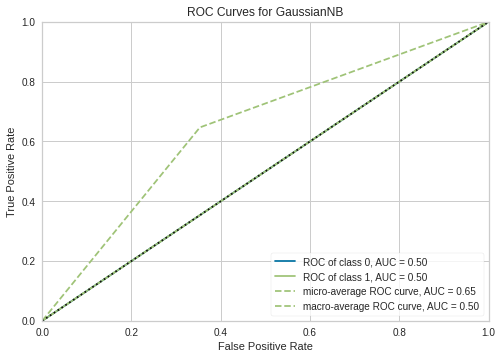

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(nb)

In [ ]:
save_model(nb, 'nb')

INFO:logs:Initializing save_model()
INFO:logs:save_model(model=GaussianNB(priors=None, var_smoothing=1e-09), model_name=nb, prep_pipe_=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Prospect',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_str...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
  

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Prospect',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_str...
                 ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                 ('cluster_all', 'passthrough'),
                 ('dummy', Dummify(target='Prospect')),
                 ('fix_perfect', Remove_100(target='Prospect')),
                 ('clean_name

In [ ]:
saved_final_model = load_model('nb')

INFO:logs:Initializing load_model()
INFO:logs:load_model(model_name=nb, platform=None, authentication=None, verbose=True)


Transformation Pipeline and Model Successfully Loaded


In [ ]:
new_prediction = predict_model(saved_final_model, data=test_df)
new_prediction.head()

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Prospect',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_str...
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluster_all', 'passthrough'),
                ('dummy', Dummify(target='Prospect')),
                ('fix_perfect', Remov

,ID,Height,Weight,Position,PreferredFoot,AttackingWorkRate,DefensiveWorkRate,PaceTotal,ShootingTotal,PassingTotal,...,RMRating,LWBRating,CDMRating,RWBRating,LBRating,CBRating,RBRating,GKRating,Label,Score
0,TEST_0000,184,75,GK,Right,Medium,Medium,3.7681,5.3947,4.8529,...,0.1351,0.2817,0.4286,0.2817,0.2857,0.2778,0.2857,5.500,0,1.0
1,TEST_0001,188,80,ST,Right,High,Medium,4.9275,4.8684,1.6176,...,4.1892,3.0986,2.7143,3.0986,3.0000,3.0556,3.0000,0.750,0,1.0
2,TEST_0002,173,68,CAM,Right,High,High,6.9565,6.3158,7.6471,...,8.3784,8.3099,8.2857,8.3099,8.1429,7.0833,8.1429,1.125,0,1.0
3,TEST_0003,178,69,CAM,Right,Medium,Medium,6.8116,6.4474,5.4412,...,7.1622,5.6338,5.1429,5.6338,5.2857,4.1667,5.2857,1.375,0,1.0
4,TEST_0004,176,72,CAM,Left,High,Low,5.5072,4.7368,4.5588,...,5.9459,5.0704,4.7143,5.0704,4.8571,4.0278,4.8571,0.750,0,1.0


In [ ]:
submission = pd.read_csv('/content/open/sample_submission.csv')

In [ ]:
new_prediction['Score'].unique()

array([1.])

In [ ]:
submission['target'] = new_prediction.loc[:,'Score']

In [ ]:
submission

,ID,Prospect,target
0,TEST_0000,0,1.0
1,TEST_0001,0,1.0
2,TEST_0002,0,1.0
3,TEST_0003,0,1.0
4,TEST_0004,0,1.0
...,...,...,...
1621,TEST_1621,0,1.0
1622,TEST_1622,0,1.0
1623,TEST_1623,0,1.0
1624,TEST_1624,0,1.0


In [ ]:
submission.to_csv('sub.csv')